# Decision Tree Classifier Building

**We will use two datasets for demonstrating Decision Tree Algorithm, namely:**
1. [diabetes.csv](https://github.com/plotly/datasets/blob/master/diabetes.csv) : This dataset contains numerical values.
2. [mushrooms.csv](https://www.kaggle.com/uciml/mushroom-classification): This dataset contains categorical values.

## 1. Using diabetes.csv

## Importing Required Libraries
Let's first load the required libraries.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Loading Data
Let's first load the required Pima Indian Diabetes dataset using pandas' read CSV function. You can download the data [here](https://github.com/plotly/datasets/blob/master/diabetes.csv).

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
data = pd.read_csv("diabetes.csv", header=None, names=col_names, skiprows=1)

In [3]:
data.head

<bound method NDFrame.head of      pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0           6      148  72    35        0  33.6     0.627   50      1
1           1       85  66    29        0  26.6     0.351   31      0
2           8      183  64     0        0  23.3     0.672   32      1
3           1       89  66    23       94  28.1     0.167   21      0
4           0      137  40    35      168  43.1     2.288   33      1
..        ...      ...  ..   ...      ...   ...       ...  ...    ...
763        10      101  76    48      180  32.9     0.171   63      0
764         2      122  70    27        0  36.8     0.340   27      0
765         5      121  72    23      112  26.2     0.245   30      0
766         1      126  60     0        0  30.1     0.349   47      1
767         1       93  70    31        0  30.4     0.315   23      0

[768 rows x 9 columns]>

## Feature Selection
Here, we need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [4]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = data[feature_cols] # Features
y = data.label # Target variable

## Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). We need to pass 3 parameters features, target, and test_set size.

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn.

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Evaluating Model
Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


Well, we got a classification rate of 66.66%, considered as good accuracy. We can improve this accuracy by tuning the parameters in the Decision Tree Algorithm.

## Visualizing Decision Trees
We can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, we also need to install graphviz and pydotplus.

> pip install graphviz

> pip install pydotplus

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

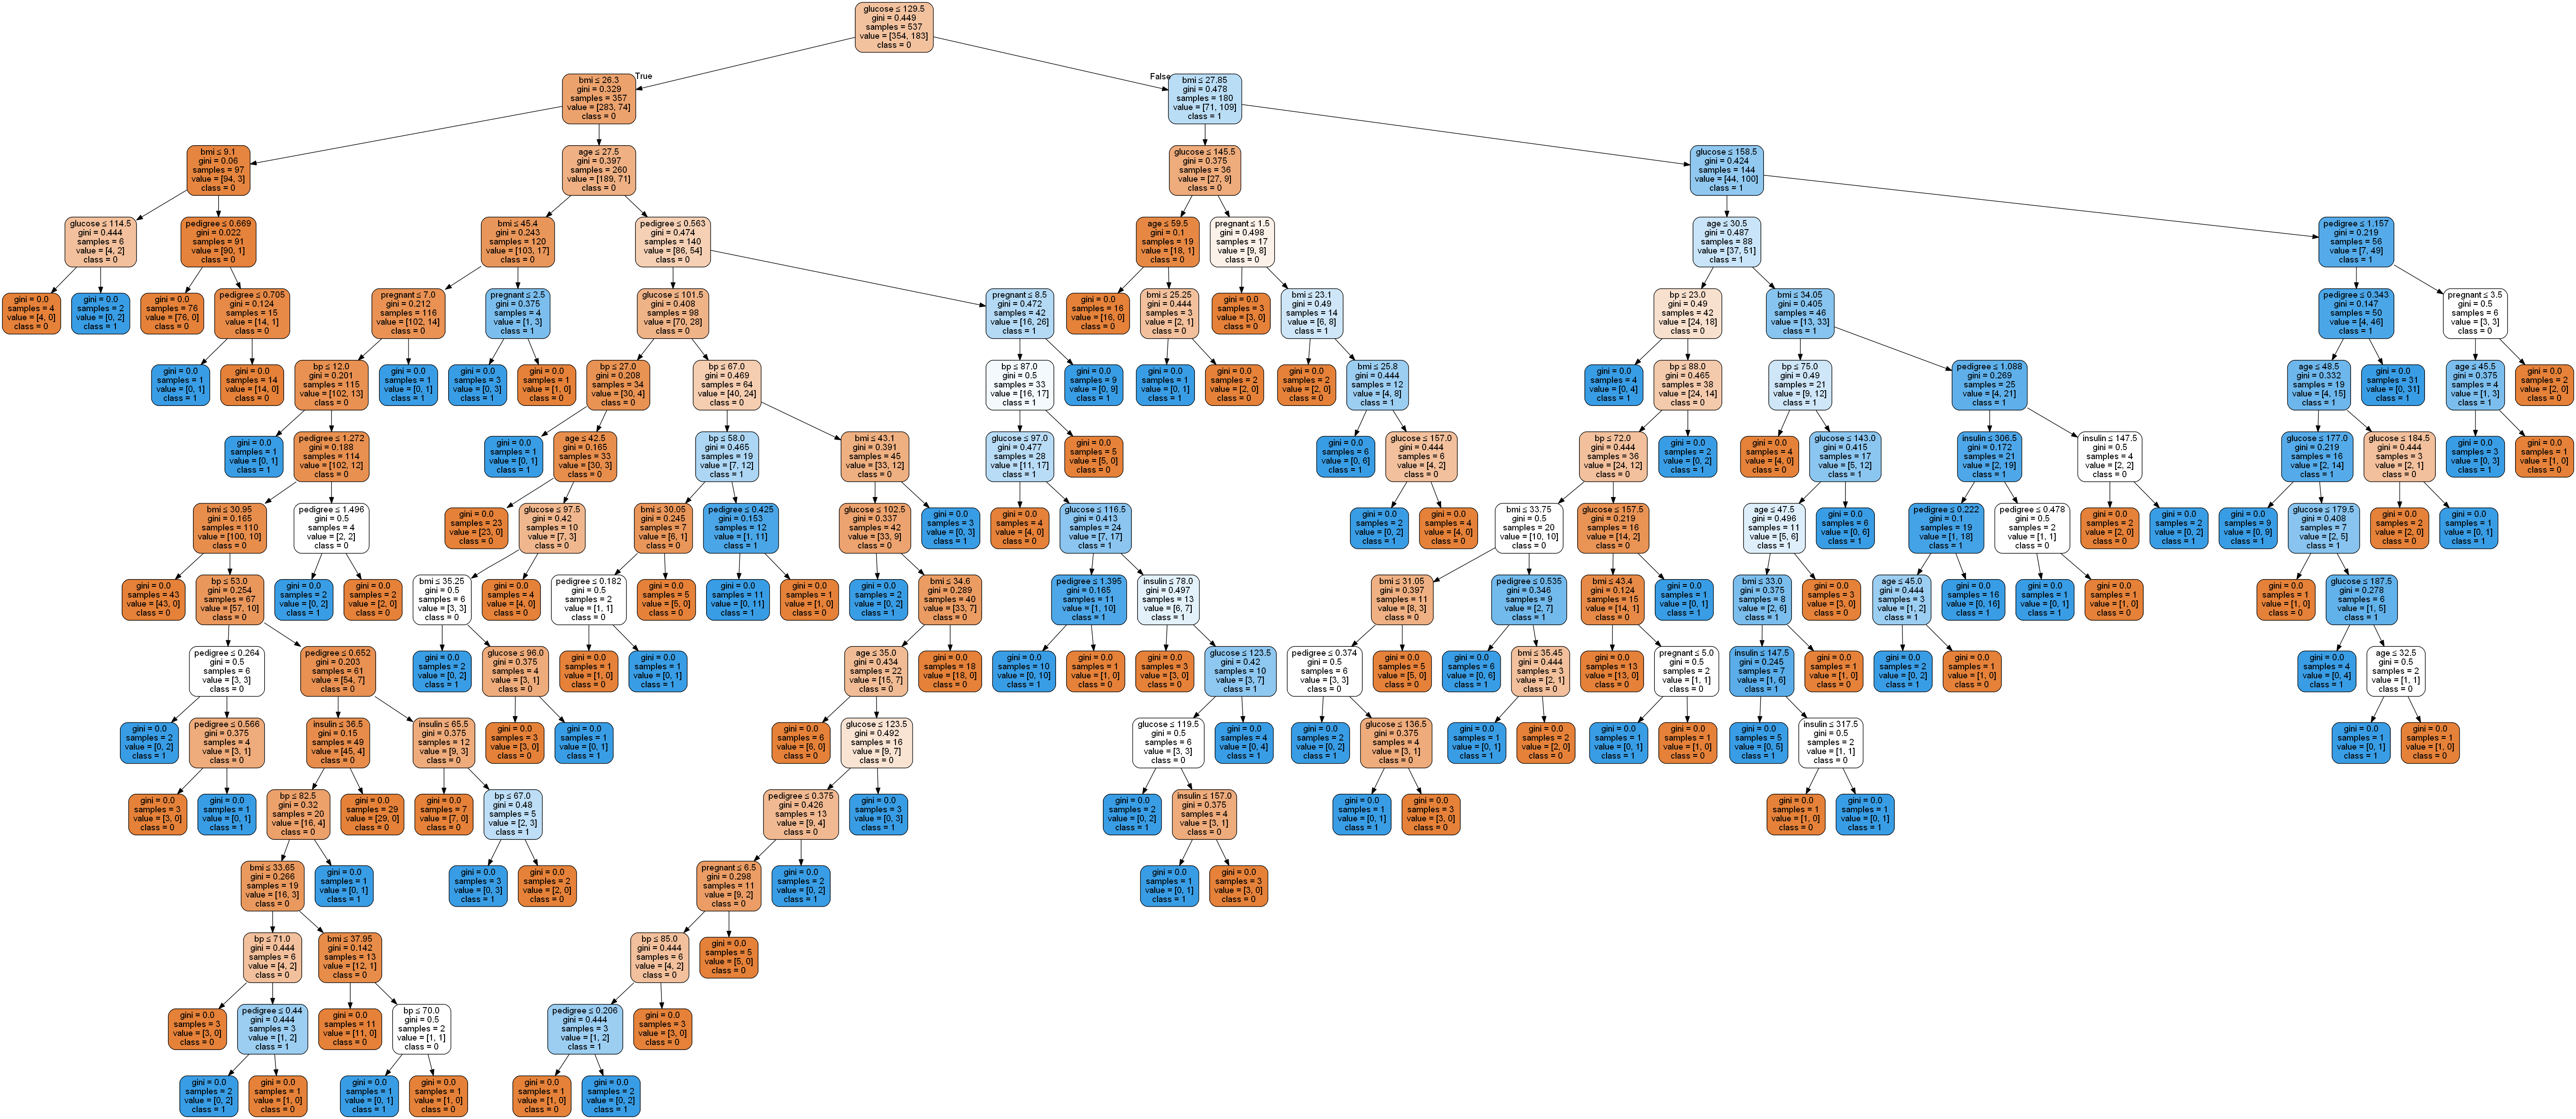

In [8]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

#dot_data = StringIO()
dot_data = export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png('diabetes.png')
Image(graph.create_png())

In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. We can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.

## Optimizing Decision Tree Performance
- **criterion : optional (default=”gini”) or Choose attribute selection measure:** This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

- **splitter : string, optional (default=”best”) or Split Strategy:** This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

- **max_depth : int or None, optional (default=None) or Maximum Depth of a Tree:** The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, we can also try other attribute selection measure such as entropy.

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


Well, the classification rate increased to 77.05%, which is better accuracy than the previous model.

## Visualizing Decision Trees

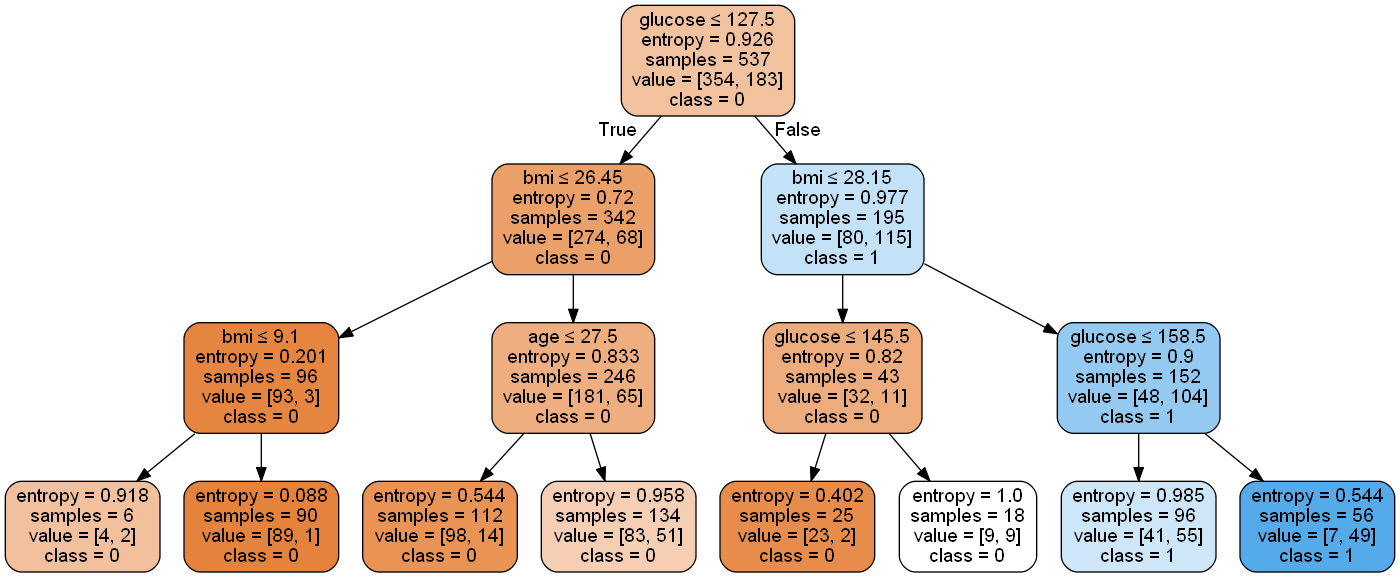

In [10]:
dot_data = export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png('diabetes.png')
Image(graph.create_png())

This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.

## 2. Using mushrooms.csv

## Importing Required Libraries
Let's first load the required libraries.

In [11]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

## Reading the csv file of the dataset
Pandas read_csv() function imports a CSV file (in our case, ‘mushrooms.csv’) to DataFrame format.

In [12]:
df = pd.read_csv("mushrooms.csv")

## Examining the Data
After importing the data, to learn more about the dataset, we'll use .head() .info() and .describe() methods.

In [13]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [15]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Shape of the dataset

In [16]:
print("Dataset shape:", df.shape)

Dataset shape: (8124, 23)


## Visualizing the count of edible and poisonous mushrooms

In [17]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [18]:
df["class"].unique()

array(['p', 'e'], dtype=object)

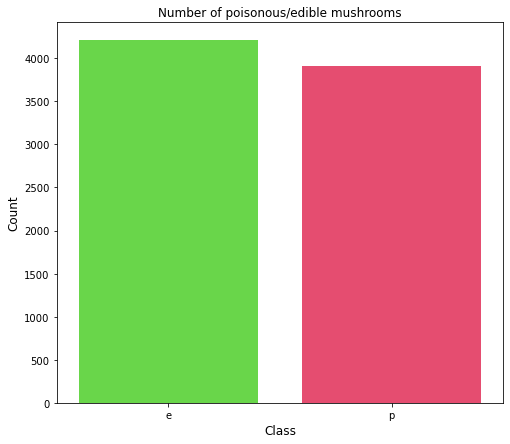

In [19]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

#### The dataset is balanced.

## Data Manipulation
The data is **categorical** so we’ll use **LabelEncoder to** convert it to **ordinal**. <br>
**LabelEncoder converts each value in a column to a number.** <br>
This approach requires the category column to be of ‘category’ datatype. By default, a non-numerical column is of ‘object’ datatype. From the df.describe() method, we saw that our columns are of ‘object’ datatype. So we will have to change the type to ‘category’ before using this approach.

In [20]:
df = df.astype('category')

In [21]:
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [22]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [23]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


The column "veil-type" is 0 and not contributing to the data so we remove it.

In [24]:
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [25]:
df=df.drop(["veil-type"],axis=1)

## Quick look at the characteristics of the data
The violin plot below represents the distribution of the classification characteristics. It is possible to see that "gill-color" property of the mushroom breaks to two parts, one below 3 and one above 3, that may contribute to the classification.

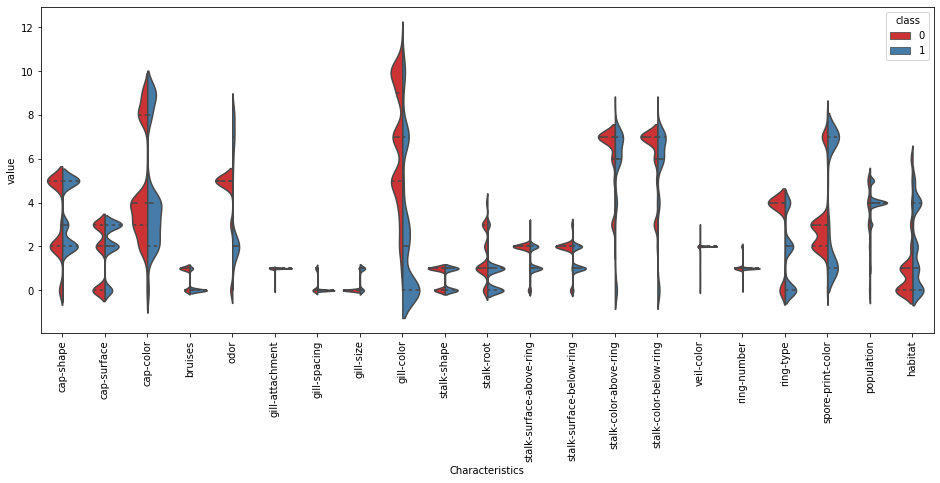

In [26]:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

## Let's look at the correlation between the variables

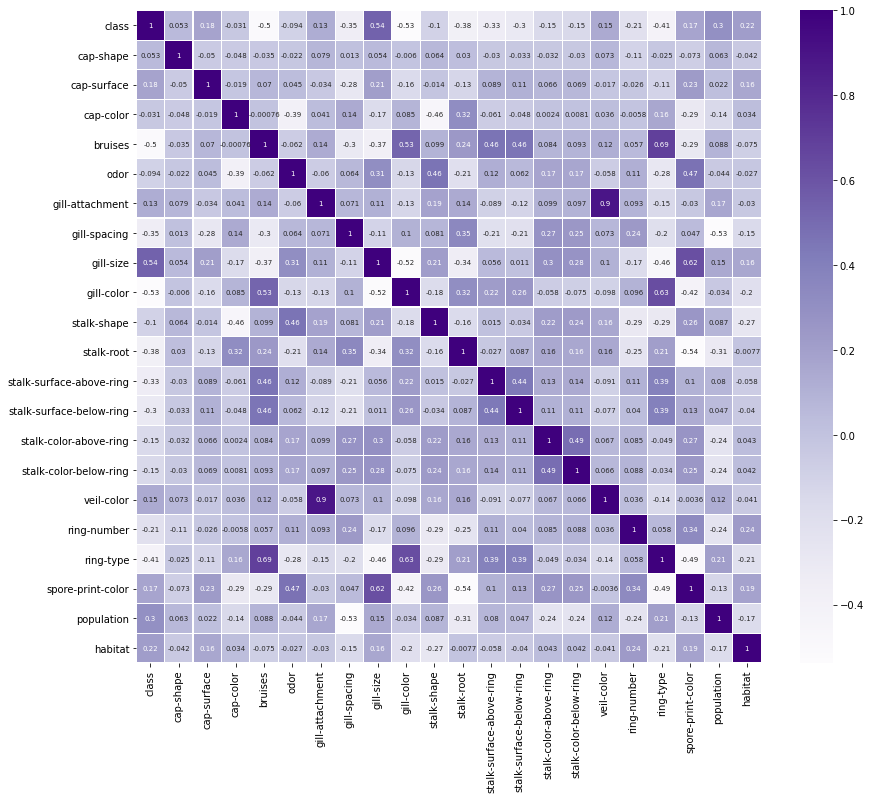

In [27]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

## Preparing the Data
Setting X and y axis and splitting the data into train and test respectively.

In [28]:
X = df.drop(['class'], axis=1)  
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)   

## Desision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

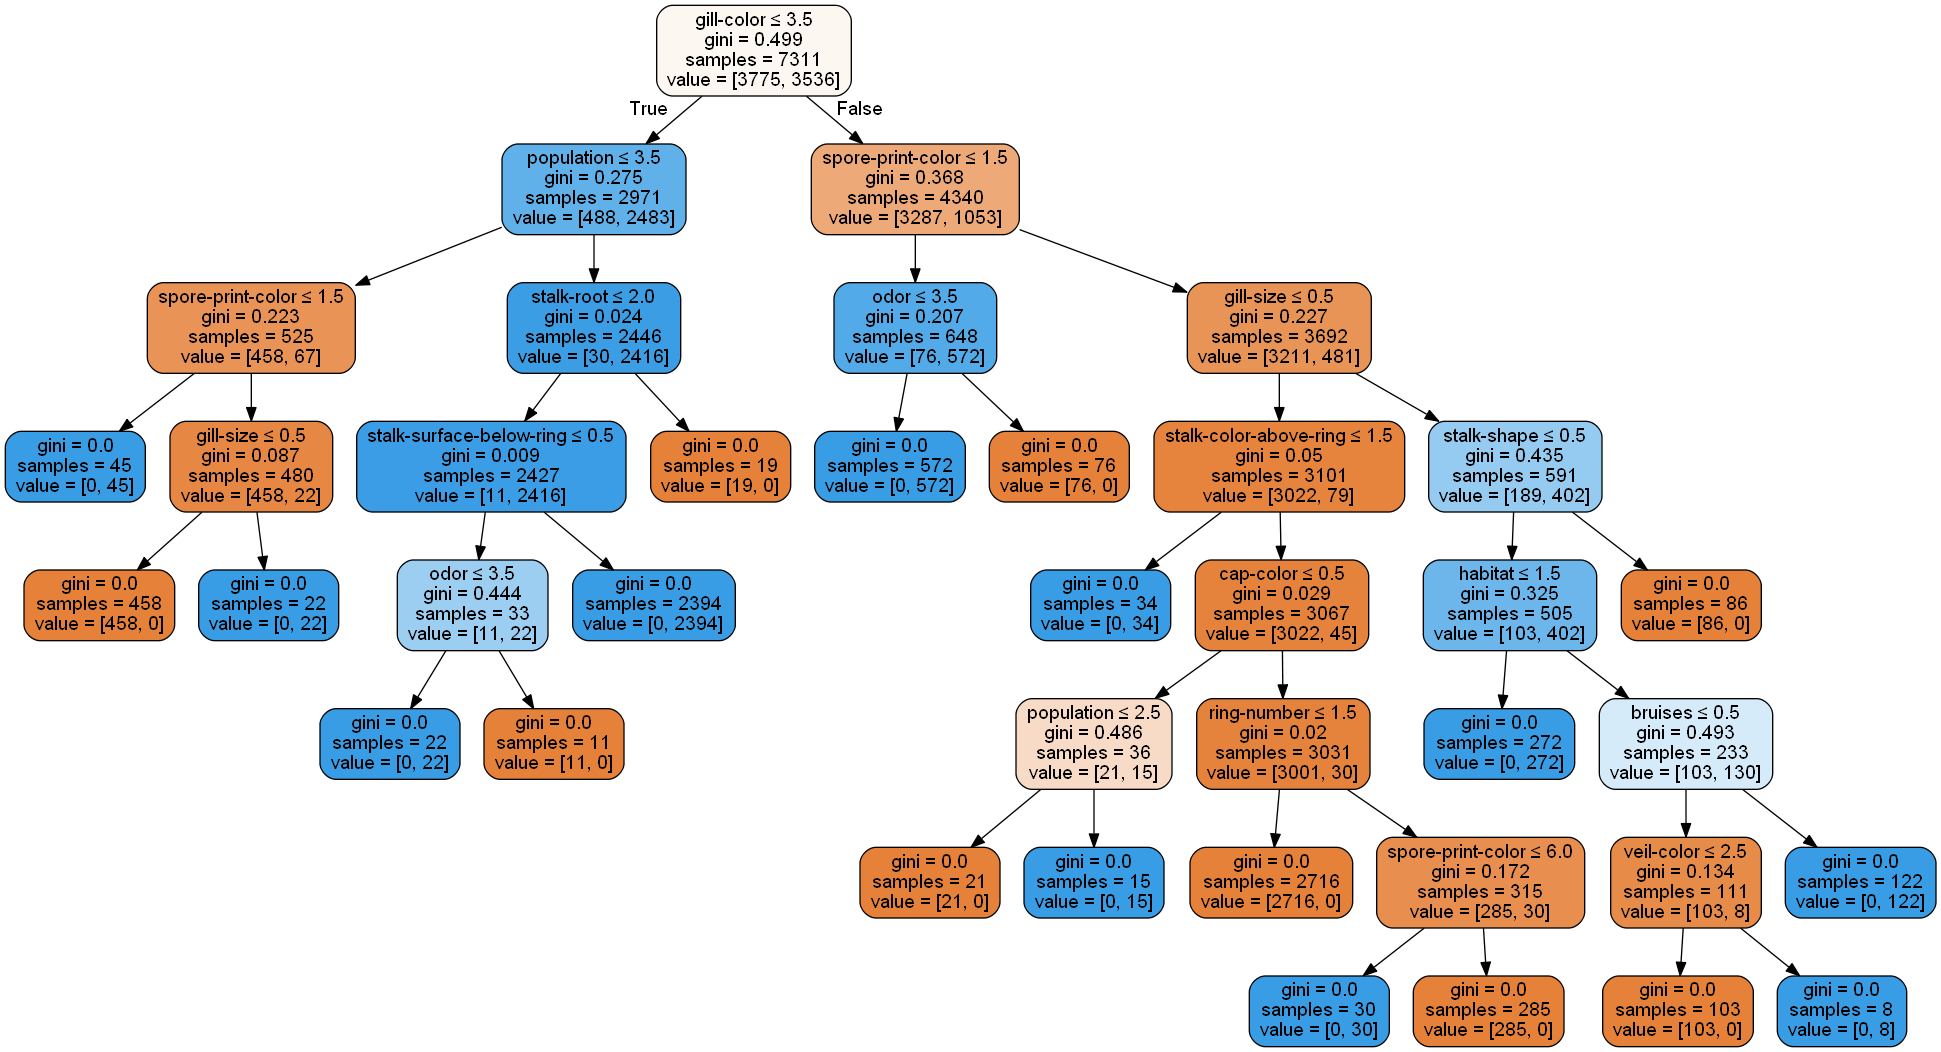

In [30]:
dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png('mushrooms.png')
Image(graph.create_png())

## Feature importance
By all methods examined before the feature that is most important is "gill-color".

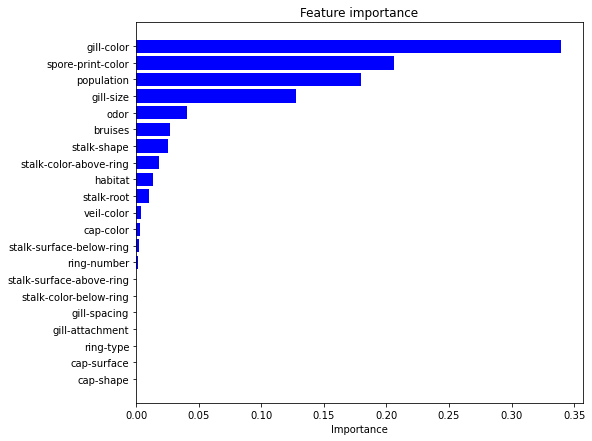

In [31]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="blue")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.show()

## Predicting and estimating the result

In [32]:
y_pred_dt = dt.predict(X_test)

In [33]:
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [34]:
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


## Confusion Matrix for Decision Tree Classifier

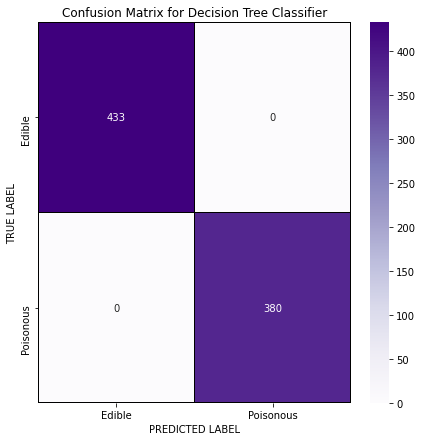

In [35]:
cm = confusion_matrix(y_test, y_pred_dt)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## Predictions
Predicting some of the X_test results and matching it with true i.e. y_test values using Decision Tree Classifier.

In [36]:
preds = dt.predict(X_test)

print(preds[:36])
print(y_test[:36].values)

# 0 - Edible
# 1 - Poisonous

[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]


As we can see the predicted and the true values match 100%

## Conclusion
From the confusion matrix, we saw that our train and test data is balanced. <br>
Decision Tree Classifier hit 100% accuracy with this dataset.